In [96]:
import random

In [97]:
solvers = ['Solver A', 'Solver B', 'Solver C', 'Solver D']

In [98]:
results = dict()
for i in range(len(solvers)):
    alpha = (1+i) * 2
    beta = 0.4
    results[solvers[i]] = dict()
    for j in range(1000):
        results[solvers[i]][str(j)] = random.betavariate(alpha, beta)

In [99]:
# generating random example timeline data
#p + ((generations_since_last_improvement * (1 / max_waiting_before_restart)) ** 4) * max_p
data = dict()
max_time = 1000
max_fitness = 10000
min_fitness = 100
n_experiments = 1000
for n in range(n_experiments):
    c = 0
    for solver in solvers:
        alpha = (1+c) * 2
        beta = 0.4
        c+= 1
        if solver not in data:
            data[solver] = dict()
        time = max_time
        fitness = max_fitness
        entries = []
        i = 0
        j = 1/max_time
        while time > 0 and fitness > min_fitness:
            time *= 1.0-j - 0.1* random.random()
            fitness *= random.betavariate(alpha, beta)#1.0-j - 0.2* random.random()
            j+= ((i * (1 / max_time)) ** 4)
            i+=1
            entries.append((max_time-time, fitness))
        data[solver][str(n)] = entries
    results = dict()
    for solver in data:
        results[solver] = dict()
        for instance in data[solver]:
            results[solver][instance] = data[solver][instance][-1][1]

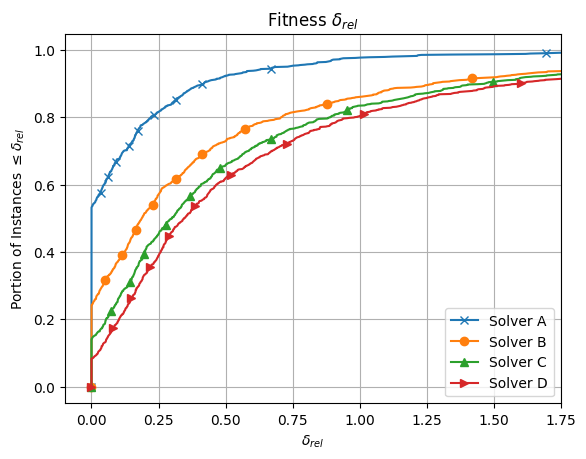

In [100]:
import util.visualization as vis
vis.visualize_gaps(results, n_instances=1000)

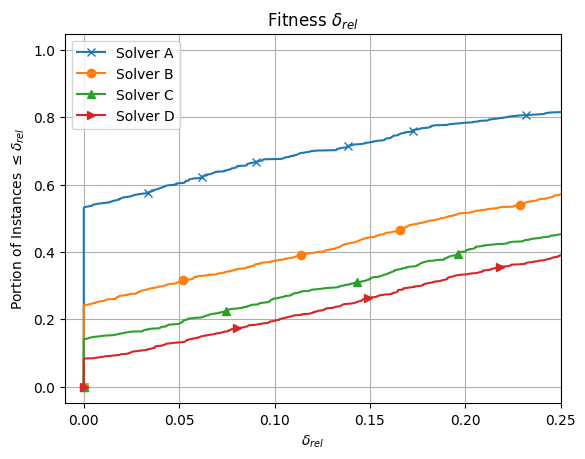

In [101]:
vis.visualize_gaps(results, x_lim_lb=-0.01, x_lim_ub=0.25)

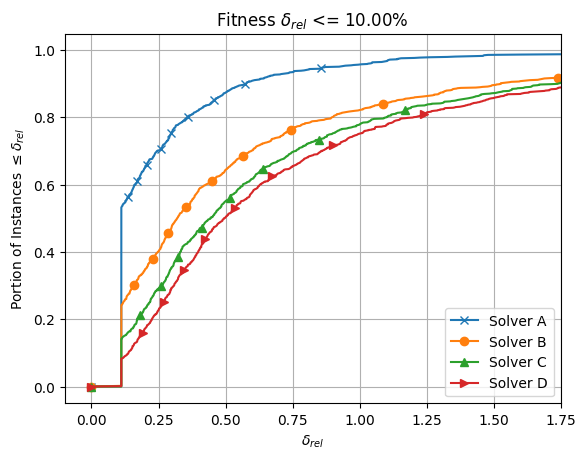

In [102]:
vis.visualize_gaps(results, delta_scope=0.9)

In [103]:
instance_data = dict()
example_instance = '1'
for solver in data:
    instance_data[solver] = data[solver][example_instance]

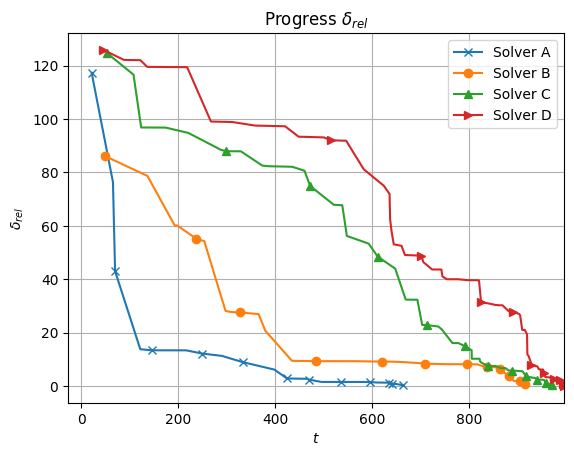

In [104]:
vis.visualize_timeline(instance_data)

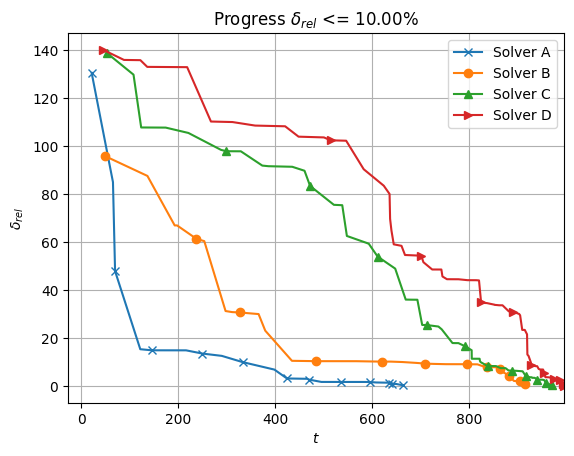

In [105]:
vis.visualize_timeline(instance_data, delta_scope=0.9)

In [106]:
from util.evaluation import minizinc_score
minizinc_data = dict()
for solver in data:
    minizinc_data[solver] = dict()
    for instance in data[solver]:
        minizinc_data[solver][instance] = data[solver][instance][-1]
minizinc_score(minizinc_data)

{'Solver A': 2173.0, 'Solver B': 1612.0, 'Solver C': 1233.0, 'Solver D': 982.0}